<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


In [1]:
import folium
from folium import plugins
from folium.plugins import HeatMap

from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---
## Загрузка и открытие файлов

In [2]:
df_1 =  pd.read_csv('.../datasets/query_1.csv')
df_2 =  pd.read_csv('.../datasets/query_3.csv')

In [3]:
display(df_1.head(8))
df_1.info()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
display(df_2.head())
df_2.info()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


📍 __Выводы__
> - Файлы были закгружены и открыты
> - Пропусков нет
> - Типы данных корректы

---
## Аналитика

In [5]:
def do_barplot(my_data,
               plot_x, plot_y,
               tit, x_l, y_l,
               my_orient='v',
               size=(15,5)):
    plt.figure(figsize=size)
    plt.title(tit)
    sns.barplot(data=my_data, x=plot_x, y=plot_y, orient=my_orient)
    plt.xlabel(x_l)
    plt.ylabel(y_l)


def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

### Топ-10 городов по количеству рейсов

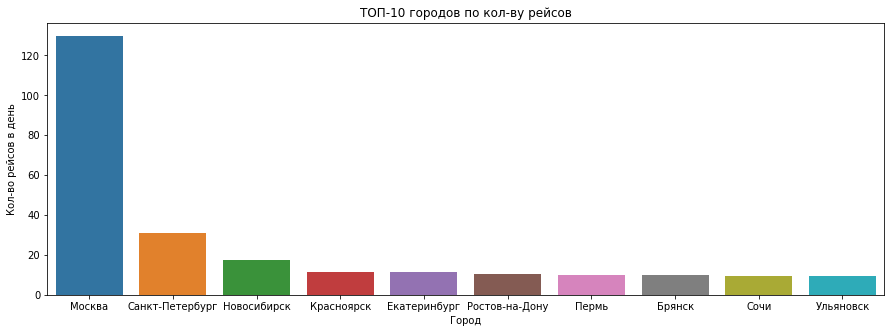

In [6]:
df_2 = df_2.sort_values(by='average_flights',
                        ascending=False)

do_barplot(df_2.head(10), 'city', 'average_flights', 'ТОП-10 городов по кол-ву рейсов', 'Город', 'Кол-во рейсов в день')

📍 __Выводы__
> Как видно из графика в лидерах по среднему кол-ву рейсов в день
> - Москва - в разы опережает другие города по кол-ву рейсов
> - Санкт-Петербург
> - Новосибирск

### Модели самолётов и количество рейсов

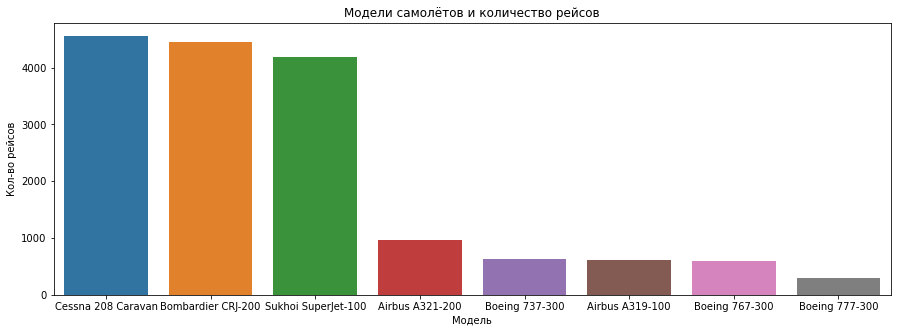

In [7]:
do_barplot(df_1.sort_values(by='flights_amount', ascending=False), 
           'model', 'flights_amount', 'Модели самолётов и количество рейсов', 'Модель', 'Кол-во рейсов')

📍 __Выводы__
> Наибольшее кол-во рейсов совершают
> - Cessna 208 Caravan - ближнее магистральное (основных авиалиний) воздушное судно, с дальностью полета - до 2000 км;
> - Bombardier CRJ-200	- среднее магистральное воздушное судно, с дальностью полета - до 3000 км;
> - Sukhoi SuperJet-100 - среднее магистральное воздушное судно, с дальностью полета - до 4600 км. <br>
> 
> Авиакомпания использует в основном суда ближне- и средне- магистральные



### Города и количество рейсов

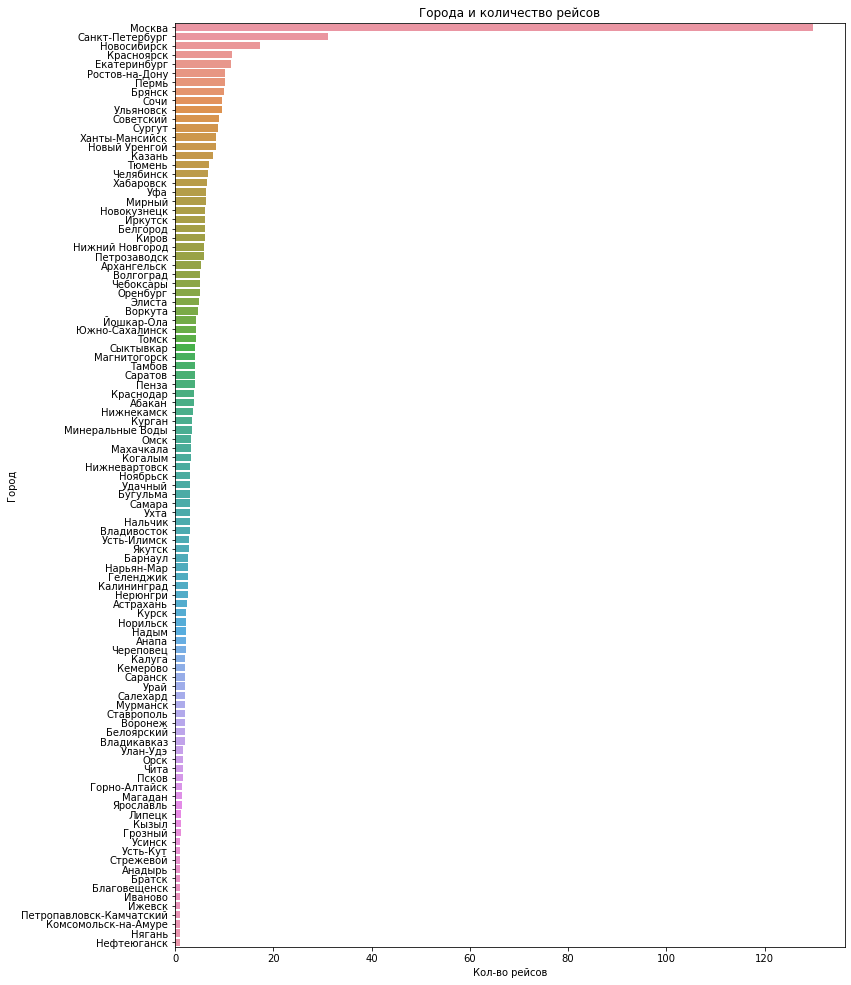

In [8]:
do_barplot(df_2.sort_values(by='average_flights', ascending=False), 
           'average_flights', 'city', 'Города и количество рейсов', 'Кол-во рейсов', 'Город', 'h', (12,17))

Как уже отмечалось ранее, Москва имеет наибольшее кол-во рейсов в сутки. <br>
Визуализируем результат на карте РФ

In [9]:
def generateBaseMap(default_location=[63.846807, 104.346282], default_zoom_start=3):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

my_map = generateBaseMap()

cordinates = pd.read_csv('https://raw.githubusercontent.com/hflabs/city/master/city.csv')
cordinates[cordinates['region'] == "Москва"]['city']
cordinates.loc[509, 'city'] = 'Москва'

In [10]:
df_2_cord = df_2.merge(cordinates[['city', 'geo_lat', 'geo_lon']], on='city')
df_2_cord = df_2_cord[['geo_lat', 'geo_lon', 'average_flights', 'city']]

In [11]:
HeatMap(data=df_2_cord[['geo_lat', 'geo_lon', 'average_flights']].values.tolist()).add_to(my_map)

for indice, row in df_2_cord.iterrows():
    folium.Circle(
        location=[row["geo_lat"], row["geo_lon"]],
        popup=row['city']
    ).add_to(my_map)
my_map

Как видно из визуализированной карты, наибольшее кол-во рейсов происходит в европейской части РФ. Также относительно большое количество рейсов происходит по южной границе России, в местах расположения крупных городов.<br>

## Выводы

Были изучены данные российской авиакомпании F9, выполняющей внутренние пассажирские перевозки.<br>
Исходя из полученных результатов, можем заключить:
- наибольшее кол-во полетов происходит в европейской части России. Безусловным лидером является Москва, что логично. Далее идут Санкт-Петербург и Новосибирск.
- чаще всего рейсы совершают самолеты Cessna 208 Caravan (до 2000 км), Bombardier CRJ-200 (до 3000 км) и Sukhoi SuperJet-100 - (до 4600 км).

<br>
Было сделано:

- Файлы были закгружены и открыты
- Проверка пропусков - Пропусков нет
- Проверка типов данных - Типы данных корректы
- Для анализа построили графики

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Файлы изучены
- [ ]  Типы данных проверены на корректность
- [ ]  Выбран топ-10 городов по количеству рейсов
- [ ]  Построен график «Модели самолётов и количество рейсов»
- [ ]  Построен график «Города и количество рейсов»
- [ ]  Построен график «Топ-10 городов и количество рейсов»
- [ ]  На каждом этапе написаны выводы
- [ ]  Написан общий вывод